In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
import glob
import os
import numpy as np
import matplotlib.gridspec as gridspec

from sklearn.manifold import TSNE
colors = ['r', 'g', 'b']

In [7]:
path = "../plane_as_abn_cls_all_info"

In [8]:
npys = glob.glob(os.path.join(path, "*.npy"))

In [10]:
files = np.load("../plane_as_abn_cls_all_info/mxn_airplane_3exp_6epoch_0abnidx_score_train.npy",allow_pickle=True)

In [11]:
files= files.tolist()

In [12]:
def load(path):
    ret = np.load(path, allow_pickle=True)
    ret = ret.tolist()
#     print(ret)
    return ret

In [13]:
def get_by_cls(d, cls):
    mean = d['mean']
    fake_latents = d['fake_latents']
    real_latents = d['real_latents']
    gt_labels = d['gt_labels']
    return mean[gt_labels==cls], fake_latents[gt_labels==cls], real_latents[gt_labels==cls]

In [14]:
def tsne(latents):
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    latents = tsne.fit_transform(latents)
    return latents

In [38]:
def compress():
    ret = load("../plane_as_abn_cls_all_info/mxn_airplane_3exp_6epoch_0abnidx_score_train.npy")
    latents = []
    for i in range(10):
        mean, fake, real = get_by_cls(ret, i)
        if i == 0:
            fake = fake[:100]
            real = real[:100]
        else:
            fake = fake[:10]
            real = real[:10]
            
        print(fake.shape, real.shape)
        fake = fake.reshape(fake.shape[0], -1, fake.shape[-1])
        real = real.reshape(real.shape[0], -1, real.shape[-1])
        latent = np.concatenate([fake,real], axis=1)
        latents.append(latent)
    print()
    latent_all_cls = np.vstack(latents)
    print(latent_all_cls.shape)
    latent_all_cls = latent_all_cls.reshape(-1, 32)
    print(latent_all_cls.shape)
    latent_all_cls = tsne(latent_all_cls)
    print(latent_all_cls.shape)
    latent_all_cls = latent_all_cls.reshape(10, -1, 12, 2)
    return latent_all_cls

In [39]:
latent_all_cls = compress()

(100, 3, 3, 32) (100, 3, 32)
(10, 3, 3, 32) (10, 3, 32)
(10, 3, 3, 32) (10, 3, 32)
(10, 3, 3, 32) (10, 3, 32)
(10, 3, 3, 32) (10, 3, 32)
(10, 3, 3, 32) (10, 3, 32)
(10, 3, 3, 32) (10, 3, 32)
(10, 3, 3, 32) (10, 3, 32)
(10, 3, 3, 32) (10, 3, 32)
(10, 3, 3, 32) (10, 3, 32)

(190, 12, 32)
(2280, 32)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2280 samples in 0.002s...
[t-SNE] Computed neighbors for 2280 samples in 0.326s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2280
[t-SNE] Computed conditional probabilities for sample 2000 / 2280
[t-SNE] Computed conditional probabilities for sample 2280 / 2280
[t-SNE] Mean sigma: 0.197077
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.686508
[t-SNE] Error after 300 iterations: 1.284437
(2280, 2)


In [37]:
latent_all_cls.shape

(190, 1, 12, 2)

In [33]:
def visualize(latent_all_cls):
#     fig = plt.figure(figsize=(8,100))
    fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(8,25))
    
    for j, ax in enumerate(axes.reshape(-1)):
        latent_one_cls = latent_all_cls[j, ...]
        fake, real = latent_one_cls[..., :9, :], latent_one_cls[..., 9:, :]
        fake = fake.reshape(fake.shape[0], 3, -1, fake.shape[-1])
        
        for k in range(3):
#             fake_i = fake[:, j, k, :].reshape(-1, 2)
#             ax.scatter(fake_i[..., 0], fake_i[...,1], marker='x',c=colors[j])
#         print(real.shape)
            real_i = real[:, k].reshape(-1, 2)

#             print(fake.shape, real.shape)
#         ax.scatter(fake_i[..., 0], fake_i[...,1], marker='x',c=colors[k])
            ax.scatter(real_i[..., 0], real_i[...,1], marker='o',c=colors[k],alpha=0.2, s=10)
        fig.add_subplot(ax)

    plt.savefig("a.png")
    fig.show()

/home/golf/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


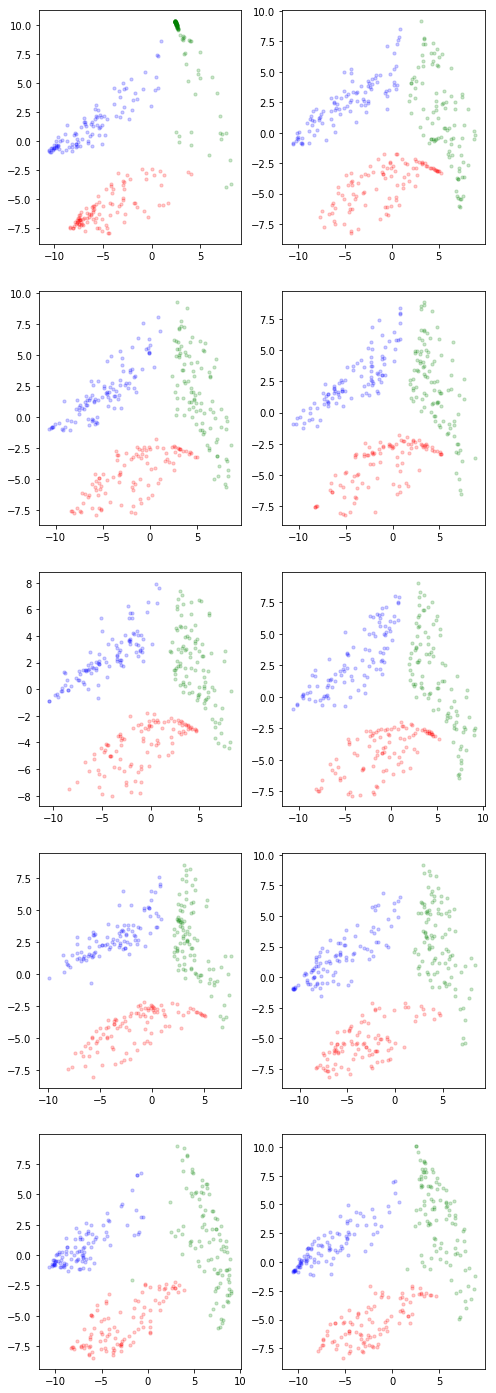

In [25]:
visualize(latent_all_cls)